In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the dataset
df = pd.read_csv(r"C:\Users\sridh\Downloads\Financial Analytics data.csv")



In [4]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [6]:
columns=['Name','Mar Cap - Crore','Sales Qtr - Crore']

In [7]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [9]:
df=df[columns]

In [10]:
df.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [11]:
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,479.000000,365.000000
mean,28043.857119,4395.976849
std,59464.615831,11092.206185
min,3017.070000,47.240000
25%,4843.575000,593.740000
50%,9885.050000,1278.300000
75%,23549.900000,2840.750000
max,583436.720000,110666.930000


In [12]:
df.isnull().sum()

Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


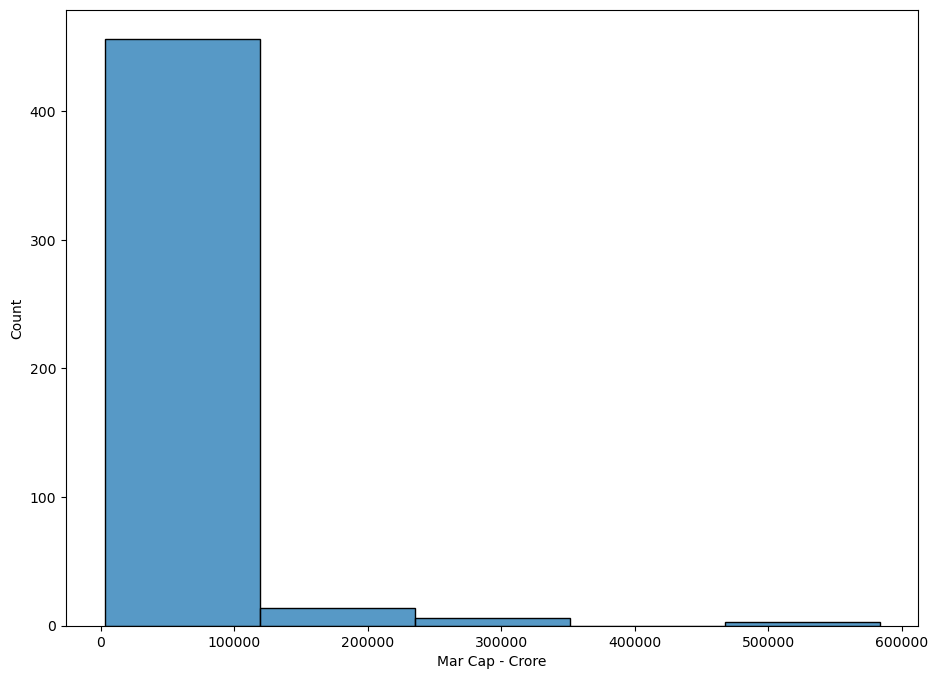

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 8))
sns.histplot(data=df, x='Mar Cap - Crore',bins=5)
plt.show()


In [19]:
df['Mar Cap - Crore'].mean()

28043.857118997912

In [20]:
df['Mar Cap - Crore'].median()

9885.05

In [21]:
df['Mar Cap - Crore']=df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median())

C:\Users\sridh\AppData\Local\Temp\ipykernel_27216\360523679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mar Cap - Crore']=df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median())


C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


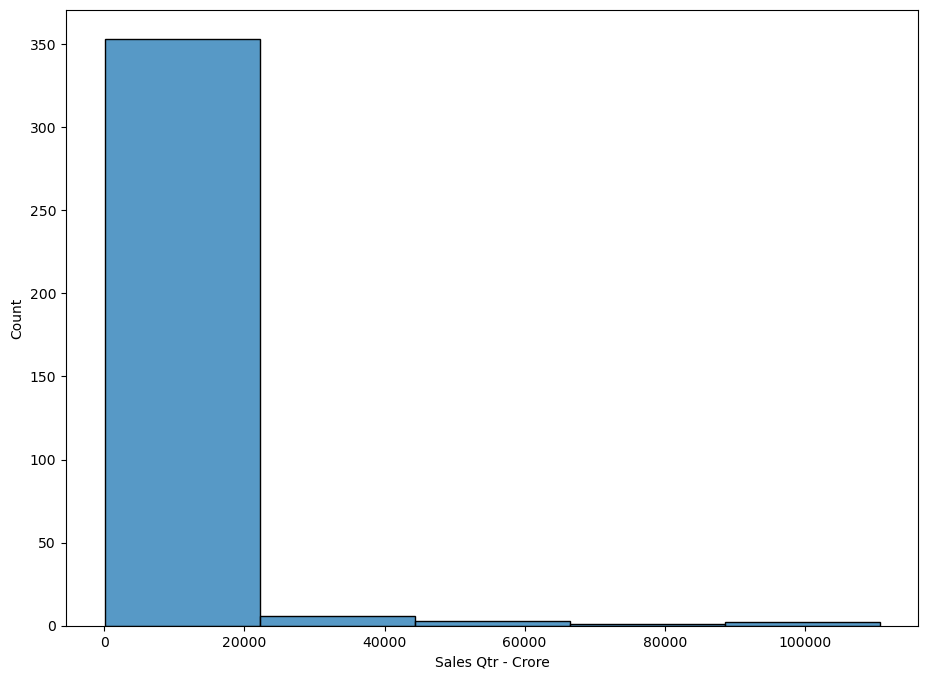

In [22]:
plt.figure(figsize=(11, 8))
sns.histplot(data=df, x='Sales Qtr - Crore',bins=5)
plt.show()

In [23]:
df['Sales Qtr - Crore']=df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median())

C:\Users\sridh\AppData\Local\Temp\ipykernel_27216\2209273281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales Qtr - Crore']=df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median())


In [24]:
df.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [25]:
df['Total Mar Cap'] = df['Mar Cap - Crore'] / 1000000
df['Total Sales'] = df['Sales Qtr - Crore'] / 1000000
total_sales = df['Total Sales'].sum()
total_mar_cap = df['Total Mar Cap'].sum()

C:\Users\sridh\AppData\Local\Temp\ipykernel_27216\2501003923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Mar Cap'] = df['Mar Cap - Crore'] / 1000000


In [26]:
# Calculate the growth rate of Mar Cap - Crore and Sales Qtr - Crore columns
df['Mar Cap Growth Rate'] = df['Mar Cap - Crore'].pct_change()
df['Sales Growth Rate'] = df['Sales Qtr - Crore'].pct_change()


In [27]:

correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])

In [28]:
correlation

0.6204889718974033

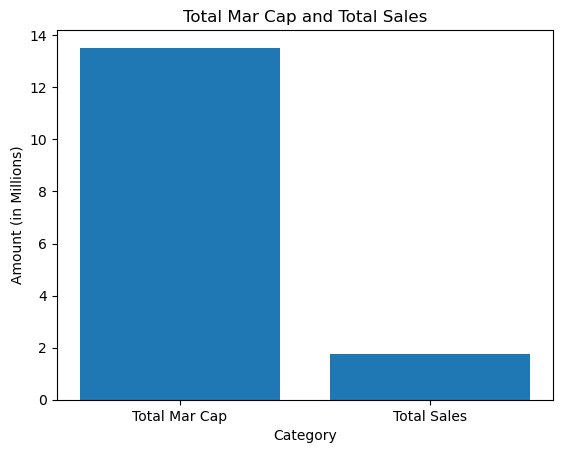

In [29]:
plt.bar(['Total Mar Cap', 'Total Sales'], [total_mar_cap, total_sales])
plt.title('Total Mar Cap and Total Sales')
plt.xlabel('Category')
plt.ylabel('Amount (in Millions)')
plt.show()

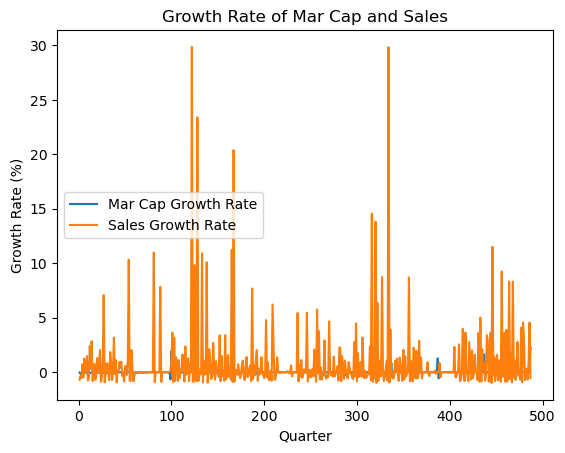

In [30]:
plt.plot(df['Mar Cap Growth Rate'], label='Mar Cap Growth Rate')
plt.plot(df['Sales Growth Rate'], label='Sales Growth Rate')
plt.title('Growth Rate of Mar Cap and Sales')
plt.xlabel('Quarter')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()


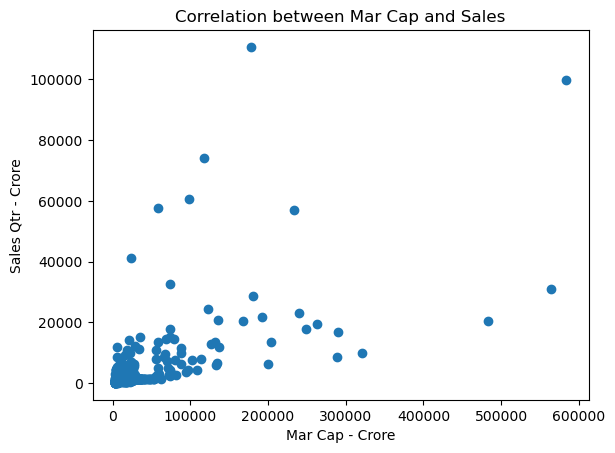

In [31]:
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])
plt.title('Correlation between Mar Cap and Sales')
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Sales Qtr - Crore')
plt.show()

In [32]:
df.to_csv('Financial.csv',index=False)

In [33]:
df.columns

Index(['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Total Mar Cap',
       'Total Sales', 'Mar Cap Growth Rate', 'Sales Growth Rate'],
      dtype='object')